In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Figure 1: Different learning regimes

In [12]:
base_dir = 'experiments'

def load_experiment_df(filename):
    return pd.read_csv(filename, dtype={'episode': int}, index_col=0)

(200, 300)

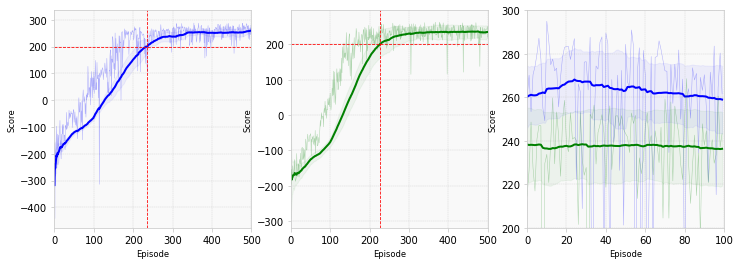

In [84]:
def plot_experiment(df, ax, color, alpha_score=0.3, show_vline=True):
    if 'score_mean' in df.columns:
        ax.plot(df[['score_mean']], color=color, linewidth=0.5, alpha=alpha_score)
        ax.plot(df[['average_mean']], color=color, linewidth=2)
        ax.fill_between(df.index, df['average_mean'], df['average_mean'] + df['average_std'], color=color, alpha=0.05)
        ax.fill_between(df.index, df['average_mean'], df['average_mean'] - df['average_std'], color=color, alpha=0.05)
        ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
        if df[df['average_mean'] > 200].shape[0] > 0 and show_vline:
            ax.axvline(df[df['average_mean'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')
    else:
        ax.plot(df[['score']], linewidth=0.5)
        ax.plot(df[['average']], color='red', linewidth=2)
        ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
        if df[df['average'] > 200].shape[0] > 0 and show_vline:
            ax.axvline(df[df['average'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')
            
def format_axis(ax):
    ax.set_xlabel('Episode', size='small')
    ax.set_ylabel('Score', size='small')
    ax.tick_params(axis='both', which='major', labelsize=10)

    ax.grid(b=True, which='major', color='#cccccc', linewidth=0.4, linestyle='--')
    ax.set_facecolor('#f9f9f9')
    _ = plt.setp(ax.spines.values(), color='#cccccc')
    _ = plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#cccccc')

    
dfA = load_experiment_df(f'{base_dir}/e1d_final/df_A.csv')
dfB = load_experiment_df(f'{base_dir}/e1_final/df_A.csv')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot_experiment(dfA, ax1, 'blue')
plot_experiment(dfB, ax2, 'green')

dfA1 = dfA[-100:]
dfA1.index = range(100)
dfA1.index.name = 'episode'
dfB1 = dfB[-100:]
dfB1.index = range(100)
dfB1.index.name = 'episode'

plot_experiment(dfA1, ax3, 'blue', show_vline=False) #, alpha_score=0)
plot_experiment(dfB1, ax3, 'green', show_vline=False) #, alpha_score=0)

format_axis(ax1)
format_axis(ax2)
format_axis(ax3)

#ax.set_xlim(0, df[df['average_mean'] > 200].iloc[0].name + 100)
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax3.set_xlim(0, 100)
ax3.set_ylim(200, 300)

#ax.set_title('Asynchronous One-step Q-learning: 16 threads, not tuned')


#font = {'color':  'gray', 'weight': 'normal', 'size': 120, 'alpha': 0.2}
#_ = fig.text(0.15, 0.6, 'Carlos Souza', fontdict=font)

## Figure 2: Different agents

(150, 300)

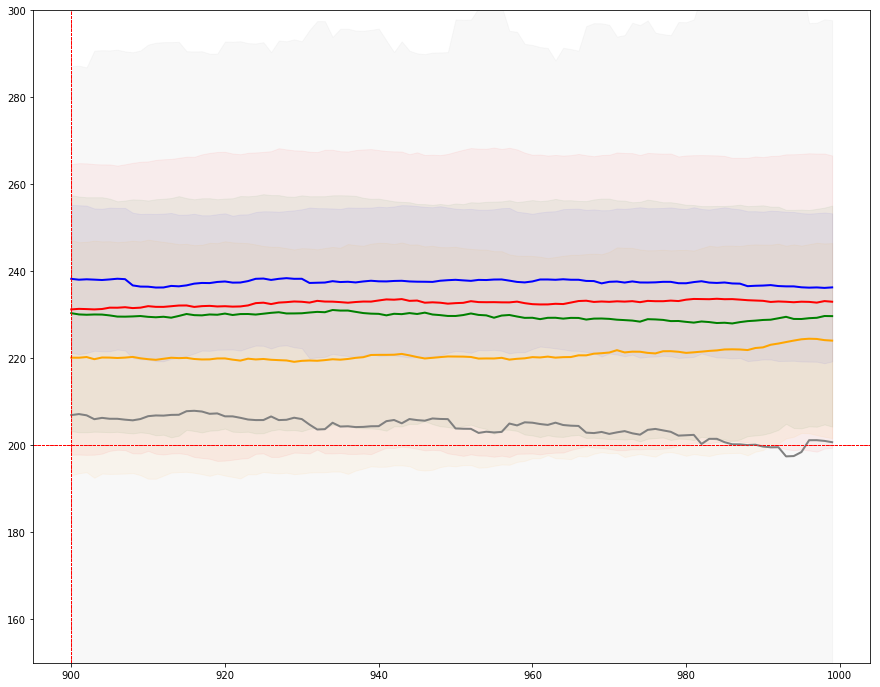

In [86]:
dfA = load_experiment_df(f'{base_dir}/e1_final/df_A.csv')
dfB = load_experiment_df(f'{base_dir}/e1_final/df_B.csv')
dfC = load_experiment_df(f'{base_dir}/e1_final/df_C.csv')
dfD = load_experiment_df(f'{base_dir}/e1_final/df_D.csv')
dfE = load_experiment_df(f'{base_dir}/e1_final/df_E.csv')

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))
plot_experiment(dfA[-100:], ax1, 'blue', alpha_score=0)
plot_experiment(dfB[-100:], ax1, 'green', alpha_score=0)
plot_experiment(dfC[-100:], ax1, 'red', alpha_score=0)
plot_experiment(dfD[-100:], ax1, 'orange', alpha_score=0)
plot_experiment(dfE[-100:], ax1, 'grey', alpha_score=0)
ax1.set_ylim(150, 300)

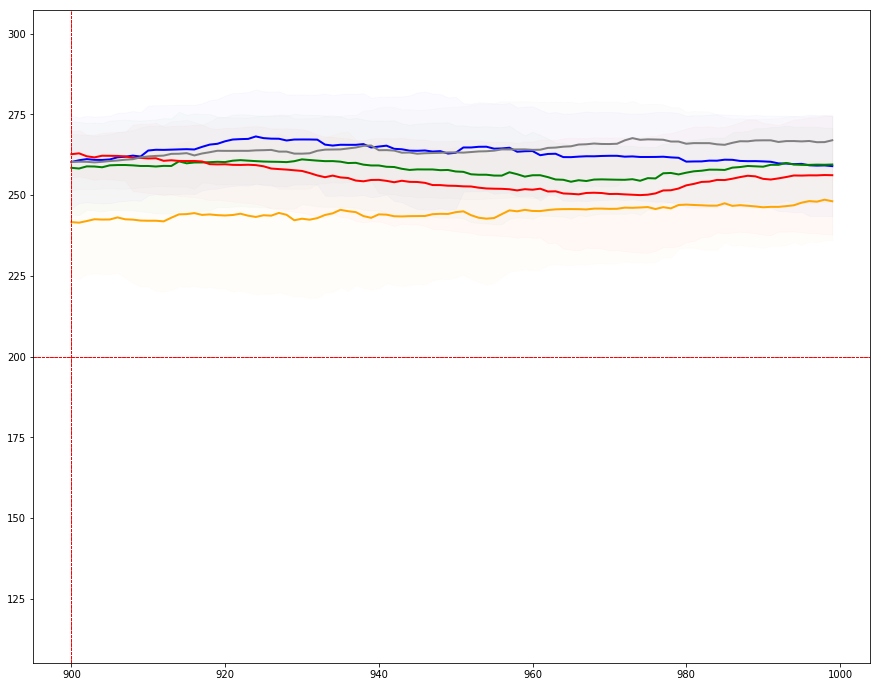

In [79]:
dfA = load_experiment_df(f'{base_dir}/e1d_final/df_A.csv')
dfB = load_experiment_df(f'{base_dir}/e1d_final/df_B.csv')
dfF = load_experiment_df(f'{base_dir}/e1d_final/df_F.csv')
dfG = load_experiment_df(f'{base_dir}/e1d_final/df_G.csv')
dfH = load_experiment_df(f'{base_dir}/e1d_final/df_H.csv')

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 12))
plot_experiment(dfA[-100:], ax1, 'blue', alpha_score=0)
plot_experiment(dfB[-100:], ax1, 'green', alpha_score=0)
plot_experiment(dfF[-100:], ax1, 'red', alpha_score=0)
plot_experiment(dfG[-100:], ax1, 'orange', alpha_score=0)
plot_experiment(dfH[-100:], ax1, 'grey', alpha_score=0)
#ax1.set_xlim(0, 300)

In [13]:
def combine_experiment_runs(experiment_folder, experiment_id, runs, df_filename):
    def load_experiment_df(filename, suffix):
        return pd.read_csv(filename, dtype={'episode': int},
                           index_col=0).add_suffix(suffix)

    frames = [load_experiment_df(f'{experiment_folder}/df_{experiment_id}_run_{x + 1:02d}.csv',
                                 suffix=f'_{x + 1:02d}') for x in range(runs)]
    df = pd.concat(frames, axis=1)

    def column_list(variable, runs):
        return [f'{variable}_{x + 1:02d}' for x in range(runs)]

    columns = []
    for variable in ['score', 'average', 'avg_q_values']:
        df[f'{variable}_mean'] = df[column_list(variable, runs)].mean(axis=1)
        df[f'{variable}_std'] = df[column_list(variable, runs)].std(axis=1)
        columns.extend((f'{variable}_mean', f'{variable}_std'))

    df = df[columns]
    df['rolling_100_score'] = df['score_mean'].rolling(100, min_periods=1).mean()
    df.to_csv(df_filename)

In [20]:
import string

full_experiment_folder = f'{base_dir}/e1_final'

for eid in string.ascii_letters[0:8].upper():
    combine_experiment_runs(full_experiment_folder, eid, 20, df_filename=f'{full_experiment_folder}/df_{eid}.csv')